Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
# Exercise 6: NumPy & Matplotlib


### Content & Grading

You will receive the following points for this exercise:


- **A.1**:  *5 P* - Read the data
- **A.2**:  *5 P* - Basic statistics of the data
- **A.3**: *10 P* - Data manipulation
- **A.4**:  *2 P* - Save the data 
- **A.5**:  *9 P* - Data analysis 
- **A.6**: *15 P* - Visualize & compare
- **A.7**:  *4 P* - Interpretation
- **B**: *10P* - Plot a map

Total: 
- 60 points 
- **up to 15 extra credit points for reasonaby commenting your code** (But don't overcomment. Add as many as needed and as few as possible. Ieally you help me to quickly realize, which code belongs to which task item).

---


### Name and Collaborator
Add your name and the name of any collaborator in the code cell below.

In [1]:
Name = 'Ntambila Daud'
Collaborators = ['None']

---
---
<a id='np'></a>
# A. Temperature Data Analysis (NumPy)

### Overview
This part of the assignment is reflecting usage of NumPy Data arrays, basic data analysis and data manipulations using real data. You are asked to analyze temperature data from Kumpula, Helsinki (in Southern Finland) and Rovaniemi (in northern Finland) and to explore how their summer temperatures have differed in 2017.

**Make sure to regularily comment your code, to receive the extra credit points for that!**


### Data data
The following files are stored in the folder **./data** of the homework repository (**geosf22_material**): 

We will use NOAA weather data. The data has been stored in a CSV file (comma delimited text file) which is stored in the data subdirectory: `6153237444115dat.csv`.

You can read the full description of the data and all the attributes from this file:  `3505doc.txt`.

The first five rows of the data look like following:

In [ ]:
# USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
# 028450,99999,201705010000,174,10,14,***,***,*,*,*,2.2,**,**,**,**,67,**,**,**,8,31,31,1009.2,*****,984.1,***,***,*****,*****,*****,*****,35
# 028450,99999,201705010020,180,10,***,4,***,*,*,*,2.9,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010050,190,10,***,4,***,*,*,*,2.1,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010100,188,12,16,***,***,*,*,*,3.2,**,**,**,**,77,**,**,**,*,31,30,1009.1,*****,984.0,***,***,*****,*****,*****,*****,35

**Note**: the data includes `*`-characters that represent no-data values.

For this exercise, you only need to read the following columns:

* **USAF** = the station ID number
    * 028450 : Rovaniemi
    * 029980 : Helsinki Kumpula
* **YR--MODAHRMN** = Year-Month-Day-Hour-Minute in Greenwich Mean Time (GMT)
* **TEMP** = Temperature in Fahrenheit
* **MAX** = Maximum temperature in Fahrenheit
* **MIN** = Minimum temperature in Fahrenheit

... using the `usecols()` parameter in the `genfromtxt()` function in NumPy. Refer to the [NumPy documentation for numpy.genfromtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) to learn how to use this parameter.

---
### A.1: Read the data

In this assignment part your task is to open and explore the NOAA weather data using NumPy. Please answer the given tasks and write your code into the codeblocks below.

1. **Import** the NumPy module **using the acronym `np`**
2. **Read the data** using NumPy into a variable called **`data`** (1 point)
    - Note: We only want the `USAF`, `YR--MODAHRMN`, `TEMP`, `MAX`, and `MIN` columns from the data file
3. **Split the data** into separate variables called `station`, `date`, `temp`, `temp_max`, and `temp_min`


In [66]:

### ADD YOUR CODE - A.1
import numpy as np

data = np.genfromtxt('6153237444115dat.csv', skip_header=1, delimiter=',',usecols = (0,2,21,26,27))

station = data[:,0]
date = data[:,1]
temp = data[:,2]
temp_max = data[:,3]
temp_min = data[:,4]

---
### A.2: Basic statistics of the data 

Request appropriate numpy attributes that provide answers to the following questions:

1. What are the dimensions of the data? 
2. What is the datatype of the data?


Answer the following questions to explore basic statistics in the data, using the functions `np.nanmean()`, `np.nanstd()` and `np.unique()`. Note that we have to use the `nan` versions of the numpy methods mean, std and unique, to make sure the `NaN` (not a number) values in the dataset are ignored. 

3. What is the mean Fahrenheit temperature in the data (the `temp` variable)? Assign this number to the variable `temp_mean`.
4. What is the standard deviation of the maximum temperature (the `temp_max` variable)? Assign this number to the variable `temp_max_std`.
5. How many unique stations exists in the data (the `station` variable)? Use the numpy method `unique()` and assign this number to the variable `station_count`.


In [28]:

### ADD YOUR CODE to print Answers to the Questions here - A.2
#1 dimensions
print(data.shape)     # gives dimensions of the data

#2 datatype
print(type(data))     # gives datatype of the data

#3 mean temperature
temp_mean = np.nanmean(temp)
print("The mean temperature is {}\N{DEGREE SIGN}F." .format(round(temp_mean,2)))

#4 standard deviation of the max temp
temp_max_std = np.nanstd(temp_max)
print("The standard deviation of the maximum temperature is {}\N{DEGREE SIGN}F." .format(round(temp_max_std,2)))

#5 unique stations
stationid = np.unique(station)
station_count = len(stationid)
print("There are {} unique stations whose IDs are {:0=6d} and {:0=6d}" .format(station_count,stationid[0].astype('int'),stationid[1].astype('int')))

(11694, 5)
<class 'numpy.ndarray'>
The mean temperature is 52.25°F.
The standard deviation of the maximum temperature is 10.3°F.
There are 2 unique stations whose IDs are 028450 and 029980


---
### A.3 Data manipulation: Remove no data values & divide data into subsets

We will keep working with the importat dataset, which should now be saved in the variable `data`, as well as in the individual column variables `station`, `date`, `temp`, `temp_max`, and `temp_min`. Work on the following tasks for data manipulation.

First, completely remove entries with nan-values:

1. Create a new mask variable `tempmask` that is `True` for all finite temperature values, and `False` for `nan` values in the `temp` variable
2. Filter (remove) all rows from the column variables (`station`, `date`, `temp`, `temp_max`, and `temp_min`) using the `tempmask` array and save the new columns in the variables (`station_noNan`, `date_noNan`, `temp_noNan`, `temp_max_noNan`, and `temp_min_noNan`)
 
After that, divide the data into separate subsets for different stations.

3. Select all rows from the data arrays containin no nan-values into variable called `kumpula` where the `station` value is `29980` using an array mask called `kmask`
4. Select all rows from the data arrays containin no nan-values into variable called `rovaniemi` where the `station` value is `28450` using an array mask called `rmask`
  

Hint: the functions `vstack()` and `transpose()` might be useful for this task.

Note: Don't be surprised, if there are still nan-values in the dataset. Keep in mind, that you have (and should have) excluded only nan-values in the temperature column of the dataset.

In [39]:

### ADD YOUR CODE for A.3
#1 new mask variable tempmask
tempmask = ~np.isnan(temp)

#2 filtering all rows from the column variables
station_noNan = station[tempmask]
date_noNan = date[tempmask]
temp_noNan = temp[tempmask]
temp_max_noNan = temp_max[tempmask]
temp_min_noNan = temp_min[tempmask]

#3 selecting al rows from nan-values 
kdata = data[data[:,0] ==29980]     # retains all columns into kdata
kmask = ~np.isnan(kdata).any(axis=1) # retains false for nan data 
kumpula = kdata[kmask]  # stores all columns with nan values in a row using kmask as index

#4 selecting al rows from nan-values 
rdata = data[data[:,0] ==28450]     # retains all columns into rdata
rmask = ~np.isnan(rdata).any(axis=1) # retains false for nan data 
rovaniemi = rdata[rmask]  # stores all columns with nan-values in a row using rmask as index

In [40]:
# Check if your subset variables contain what they should
# (you don't need to modify this cell)

print("Kumpula: \n", kumpula[:5,:], "\n")
print("Rovaniemi: \n", rovaniemi[:5,:], "\n")


Kumpula: 
 [[2.99800000e+04 2.01705011e+11 4.40000000e+01 4.40000000e+01
  3.50000000e+01]
 [2.99800000e+04 2.01705012e+11 4.80000000e+01 5.40000000e+01
  4.30000000e+01]
 [2.99800000e+04 2.01705021e+11 5.00000000e+01 5.00000000e+01
  3.40000000e+01]
 [2.99800000e+04 2.01705022e+11 5.30000000e+01 6.10000000e+01
  4.90000000e+01]
 [2.99800000e+04 2.01705031e+11 4.70000000e+01 5.30000000e+01
  3.80000000e+01]] 

Rovaniemi: 
 [[2.84500000e+04 2.01705011e+11 3.10000000e+01 3.40000000e+01
  3.10000000e+01]
 [2.84500000e+04 2.01705012e+11 4.20000000e+01 4.40000000e+01
  3.00000000e+01]
 [2.84500000e+04 2.01705021e+11 4.10000000e+01 4.20000000e+01
  3.50000000e+01]
 [2.84500000e+04 2.01705022e+11 3.70000000e+01 4.50000000e+01
  3.60000000e+01]
 [2.84500000e+04 2.01705031e+11 3.70000000e+01 3.70000000e+01
  3.30000000e+01]] 



---
### A.4 Save the data into a csv-file

Now save the data for each station into a csv-file `data_kumpula.csv` and `data_rovaniemi.csv`, using the savetext() function in the code cell below. 


In [42]:

### ADD YOUR CODE for A.4
# Saving the two files as csv
np.savetxt('data_kumpula.csv', kumpula, delimiter=',',header="StationID (USAF), Dates,Temp, Tem_max, Temp_max, Temp_min")
np.savetxt('data_rovaniemi.csv', rovaniemi, delimiter=',',header="StationID (USAF), Dates,Temp, Tem_max, Temp_max, Temp_min") 

---
### A.5 Data analysis 

In this problem the aim is to understand the differences between temperatures in Helsinki Kumpula and Rovaniemi. The data are now stored in your variables `kumpula` and `rovaniemi`. Remember to comment your code.


1. What was the median temperature during the observed period in:
    - Helsinki Kumpula? (store the answer in a variable `kumpula_median`
    - Rovaniemi? (store the answer in a variable `rovaniemi_median`

2. The median temperatures above consider data from quite a long period of time (May-Aug), hence the differences might not be so clear. Hence, **find out what the mean temperatures in May and June in Kumpula and Rovaniemi were:**
    - Select from `rovaniemi` and `kumpula` arrays the rows where values of the `date` column are from May 2017 and assign them into mask variables `rovaniemi_may` and `kumpula_may`
    - Repeat the procedure for the month of June and assign those values into mask variables `rovaniemi_june` and `kumpula_june`

3. Print the mean, min and max temperatures for both locations in May and June using the new masks (`rovaniemi_may`,`kumpula_may`,`rovaniemi_june` and `kumpula_june`).

In [68]:

### ADD YOUR CODE for A.5
#1 median temperature for kumpula and rovaniemi
kumpula_median = np.median(kumpula[:,2])
print(" The median temperature for kumpula is " , kumpula_median)

rovaniemi_median = np.median(rovaniemi[:,2])
print(" The median temperature for rovaniemi is " , rovaniemi_median)


 The median temperature for kumpula is  59.0
 The median temperature for rovaniemi is  53.0


In [69]:
### ADD YOUR CODE for A.5
#2 selecting data for Rovaniemi and Kumpula in May 2017
rovaniemi_may = rovaniemi[(rovaniemi[:,1] >=201705e+6) & (rovaniemi[:,1] <201706e+6)]
kumpula_may = kumpula[(kumpula[:,1] >=201705e+6) & (kumpula[:,1] <201706e+6)]
# selecting data for Rovaniemi and Kumpula in June 2017
rovaniemi_june = rovaniemi[(rovaniemi[:,1] >=201706e+6) & (rovaniemi[:,1] <201707e+6)]
kumpula_june = kumpula[(kumpula[:,1] >=201706e+6) & (kumpula[:,1] <201707e+6)]

In [78]:
### ADD YOUR CODE for A.5
3# printing the mean, min and max temperatures for Rovaniemi in May  using the new masks
print('The mean, min, and max temperatures for Rovaniemi in May \
is {}\N{DEGREE SIGN}F, {}\N{DEGREE SIGN}F and {}\N{DEGREE SIGN}F repectively.\n'.format(round(np.mean(rovaniemi_may[:,2]),2), \
                                       np.amin(rovaniemi_may[:,2]),np.amax(rovaniemi_may[:,2])))
print('The mean, min, and max temperatures for Rovaniemi in June  \
is {}\N{DEGREE SIGN}F, {}\N{DEGREE SIGN}F and {}\N{DEGREE SIGN}F repectively.\n'.format(round(np.mean(rovaniemi_june[:,2]),2), \
                                       np.amin(rovaniemi_june[:,2]),np.amax(rovaniemi_june[:,2])))

# printing the mean, min and max temperatures for Kumpula in June using the new masks
print('The mean, min, and max temperatures for Kumpula in May \
is {}\N{DEGREE SIGN}F, {}\N{DEGREE SIGN}F and {}\N{DEGREE SIGN}F repectively.\n'.format(round(np.mean(kumpula_may[:,2]),2), \
                                       np.amin(kumpula_may[:,2]),np.amax(kumpula_may[:,2])))
print('The mean, min, and max temperatures for Kumpula in June \
is {}\N{DEGREE SIGN}F, {}\N{DEGREE SIGN}F and {}\N{DEGREE SIGN}F repectively.'.format(round(np.mean(kumpula_june[:,2]),2), \
                                       np.amin(kumpula_june[:,2]),np.amax(kumpula_june[:,2])))

The mean, min, and max temperatures for Rovaniemi in May is 38.27°F, 27.0°F and 54.0°F repectively.

The mean, min, and max temperatures for Rovaniemi in June  is 52.97°F, 34.0°F and 71.0°F repectively.

The mean, min, and max temperatures for Kumpula in May is 50.13°F, 36.0°F and 64.0°F repectively.

The mean, min, and max temperatures for Kumpula in June is 57.61°F, 44.0°F and 70.0°F repectively.


---
### A.6 Visualize & compare time series from *Kumpula* and *Rovaniemi*

In the previous part of this assignment you have extracted the hourly temperature measurements during the month of May, 2017 for the two locations *Kumpula* and *Rovaniemi*. These should be stored in the numpy arrays `kumpula` and `rovaniemi`. Now plot these time series to compare them.

Create a plot with matplotlib.pyplot and format it the following way:

1. Use a dashed line format and add circle markers for the data points.
2. Plot the *Kumpula* graph in red, and *Rovaniemi* in blue.
3. Include a title `"Kumpula & Rovaniemi Temperatures in May 2017"`.
4. Add an X-label `"Time"`.
5. Add a Y-label `"Temperature [°F]"`.
6. Mark the highest peak in one of the two time series by adding text to the graph: `'High temperature in May 2017 (location)'`
7. Add date labels to the x axis in datetime format `'%Y%m%d%H%M'`. <br> Hint: use the `plt.subplots()` function this time, without creating rows or colums of subplots.
8. Add a legend for the two colored graphs to the plot. 
9. Add a grid to the background.
10. Save the figure in a .png image file.


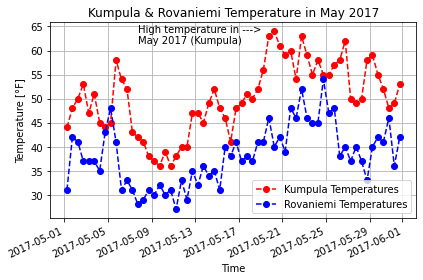

In [110]:

### ADD YOUR CODE - A.6
import matplotlib.pyplot as plt
from datetime import datetime
# converting the datetime into '%Y%m%d%H%M' format
RovDateStr = (rovaniemi_may[:,1].astype(int)).astype(str)
RovDate = [ datetime.strptime(i, '%Y%m%d%H%M') for i in RovDateStr]

KumDateStr = (kumpula_may[:,1].astype(int)).astype(str)
KumDate = [ datetime.strptime(t, '%Y%m%d%H%M') for t in KumDateStr]

fig, ax = plt.subplots()
# plotting temperature for Kumpula
ax.plot(KumDate,kumpula_may[:,2],"ro--", label='Kumpula Temperatures')
# plotting temperature for Rovaniemi
ax.plot(RovDate,rovaniemi_may[:,2],"bo--", label='Rovaniemi Temperatures')
plt.xticks(rotation=25, ha = 'right')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [\N{DEGREE SIGN}F]')
ax.set_title("Kumpula & Rovaniemi Temperature in May 2017")
ax.grid()
ax.legend(loc='lower right')
ax.text(KumDate[13],61.5,'High temperature in --->\nMay 2017 (Kumpula)')
plt.tight_layout()  # prevents cutting off the dates when saving the plot
plt.savefig('Kumpula&Rovaniemi.png') # save in standard resolution
plt.show()
           

---
### Task A.7: Interpretation

Let's briefly interpret the results of this data analysis. Justify your answers to the following questions based on the data analysis results from this exercise (edit the markdown cell below to add your answers):

1. Did you find large temperatures differences between the months?
2. Is Rovaniemi a much colder place than Kumpula?

### ---
1. Yes, I found a large differences between the months especially for Rovaniemi. Its mean temperature in May and June are  38.27 and 52.97 degrees Fahrenheit which gives a difference of 14.7 degree Fahrenheit while for Kumpula station the mean difference small 7.48 Fahrenheit (half of Rovaniemi)
**ADD YOUR ANSWERS FOR A.6 IN THIS MARKDOWN CELL !!!**

### ---
2. Yes, Rovaniemi is much colder place than Kumpula. It is also event from the plot of time series that, its temperature values indicate coldness

---
<a id='mpl'></a>
# B. Plot a Map with Matplotlib


### Overview
Plot the subset/slice of a gridded dataset with adjusted axes labels.

### Data
The following file is stored in the folder **./data** of the homework repository (**geosf22_material**): 

The file `'US_MSR_lowRes_terrain.dat'` contains a georeferenced shaded relief map of the USA.

In the code cell below, your are already provided with code to import this dataset from the file into the variable `reliefUS`. It already stores metadata from the file header, and `x` and `y` coordinates of the shaded relief in form of a meshgrid.

### Task
 In the code cell below, you are also given coordinate bounds for a smaller area in the Northeast (NE) of the United States, stored in the variables `latMin`, `latMax`, `lonMin` and `lonMax`. Your task is to slice data for this bounding box out of the shaded relief data set. Then, plot the sliced out data frame in a matplotlib image with correctly labeled coordinate axes. In addition, plot the location of the city of New York and two further cities of your choice into the map. For that you need to:

* Find correct indicees for the bounding box coordinates in the coordinate arrays `x_col` and `y_col`. (2 points)
* Slice all relevant arrays to the bounding box using those indicees. (2 points)
* Plot  relief data correctly labeled axes, the x and y coordinates. (2 points)
* Plot the relief with a reversed gray scale colorbar. (1 point)
* Plot the location of the city New York, with the coordinates `NY_lat` and `NY_lon` using a colored dot marker. (1 point)
* Label the dot marker for the city of New York with its name. (1 point)
* Find coordinates of two more cities in the map frame and add colored dots for their locations. (1 point)


In [111]:
# provided code to:
#    import the relief data, 
#    define the coordinate arrays (meshgrids)
#    define new bounding box for reduced data fram

import numpy as np

# reading the file using numpy function genfromtxt, skipping header
filename = "./US_MSR_lowRes_terrain.dat"  # USA Shaded relief data
reliefUS = np.genfromtxt(filename, delimiter=' ', skip_header=6) 

# bounding box information from file header
xllcorner = -129.9727818920000004
yllcorner =  15.5224817269999988
cellsize  =   0.04001
[yDim,xDim] = reliefUS.shape

# Creating meshgrids x and y that hold lon and lat coordinates for each data point
x_col = np.empty(reliefUS.shape)
y_col = np.empty(reliefUS.shape)
x_col = np.linspace(xllcorner,xllcorner+cellsize*(xDim+1), xDim)
y_col = np.linspace(yllcorner,yllcorner+cellsize*(yDim+1), yDim)
y_col = np.flip(y_col)
x, y = np.meshgrid(x_col,y_col)

# defining a new bounding box for NE USA to be extracted from the shaded relief image
latMin = 36
latMax = 50
lonMin = -98
lonMax = -65

# coordinates New York
NY_lat = 40.730610
NY_lon = -73.935242

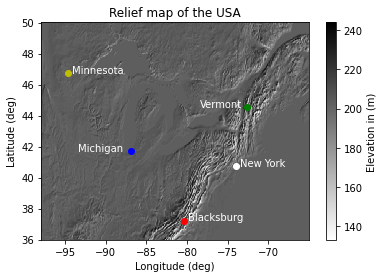

In [147]:

### YOUR CODE HERE - Task B
x_col_index = np.where((x_col>=lonMin) & (x_col<=lonMax))       #  defining the index for x_col subset data
y_col_index = np.where((y_col>=latMin) & (y_col<=latMax))       #  defining the index for y_col subset data
x_sub_grid,y_sub_grid = np.meshgrid(x_col[x_col_index],y_col[y_col_index])  # this creates meshgrids x and y of the subset data

# creating a grid relief of data for plotting
reliefUS_sub = reliefUS[y_col_index[0][0]:y_col_index[-1][-1]+1,x_col_index[0][0]:x_col_index[-1][-1]+1]

# cordinates for the other selected locations, Blacksburg, Michigan, Vermont and Minnesota
Blacksburg_lat = 37.2296
Blacksburg_lon = -80.4139

Michigan_lat = 41.7075
Michigan_lon = -86.8950

Vermont_lat = 44.5588
Vermont_lon = -72.5778

Minnesota_lat = 46.7296
Minnesota_lon = -94.6859

# plots the data
plt.pcolormesh(x_sub_grid,y_sub_grid, reliefUS_sub, shading='auto',cmap='gray_r')
cbar = plt.colorbar()
plt.plot(NY_lon,NY_lat,"wo")                     # location or dot mark of New York city
plt.plot(Blacksburg_lon,Blacksburg_lat,"ro")     # location or dot mark of Blacksburg 
plt.plot(Michigan_lon,Michigan_lat,"bo")         # location or dot mark of Michigan
plt.plot(Vermont_lon,Vermont_lat,"go")           # location or dot mark of Vermont
plt.plot(Minnesota_lon,Minnesota_lat,"yo")       # location or dot mark of Minnesota
plt.text(NY_lon+0.5, NY_lat, 'New York', color="white") # text for New York city
plt.text(Blacksburg_lon+0.5, Blacksburg_lat, 'Blacksburg', color="white") # text for Blacksburg city
plt.text(Michigan_lon-6.5, Michigan_lat, 'Michigan', color="white")       # text for Michigan 
plt.text(Vermont_lon-5.8, Vermont_lat, 'Vermont', color="white")          # text for Vermont city
plt.text(Minnesota_lon+0.5, Minnesota_lat, 'Minnesota', color="white")    # text for Minnesota 
plt.xlabel('Longitude (deg)')          # x-axis label
plt.ylabel('Latitude (deg)')           # y-axis label
plt.title('Relief map of the USA')     # title
cbar.set_label('Elevation in (m)')     # colorbar with label